# Part II - Ford GoBike System Data
## By Tuğba Telli

## Investigation Overview

> In this presentation, various graphs were created to make sense of the data set. First, I examined the data structure. Then I thought about what I was curious about by looking at this data. In the univarity section, I created a histogram and a bar chart to examine the distribution of age, user types and gender. 

> In the bivariate exploration section, I created a scatterplot and a box plot to examine the gender distribution.  

> In the multivariate exploration section, I compared gender and user type with a facet plot and age, duration second, user type and gender with a plot matrix. At the end of each section, I wrote down the findings in the graphs and any interesting output. In the conclusion section, I added a summary of the findings.


## Dataset Overview and Executive Summary

### Univariate Section

> 1. First, the table was cleaned. Since I wanted to examine various distributions by age, I calculated the age of the members from the data in the birth year column. Then I created a barchart examining the age distribution. The result shows that the highest group in the age distribution is between 20-40 years old.

> 2. The second barchart shows the distribution of user types. When the two types of users (subscriber, customer) in the dataset are proportioned, it is concluded that the subscriber group is the most users.

> 3. When the usage rate of gender is analyzed, it is found that men use the server more.


### Bivariate Section

> The first graph is a scatterplot comparing gender vs age. The distribution of age groups by gender is actually parallel to each other. While the young population constitutes more users in all groups, women, men and other, the frequency of use decreased with age.

> The second graph is a box plot. Again, I wanted to show the age and gender distribution in a box plot. We observed that the result was the same as the previous one.

> The 3rd graph is a heatmap. the age distribution of the user type is shown in a heatmap. It is seen that there are more members and for both categories, the 22-35 age range is heavily used. The usage rate decreases with increasing age. 


### Multivariate Section

> Here I have drawn a plot matrix and compared four values: age, user type, member gender and duration second. Of the values not compared above, for example, there is an inverse correlation between age and duration second. In other words, as age increases, downtime decreases. When we look at gender and duration second, we see that duration second is more stable in men, while the graph continues intermittently in women. We can say that duration second is more variable in women. 

> To further elaborate on this issue, we examined the distribution between age, gender and duration second in the second facet grid graph. Here, duration second and age are inversely proportional for all three gender categories. For men, duration sec is slightly longer in each age group compared to the other two categories. For women, duration second is higher in the 50-80 age range than in any other category.


> Below I have added the packages I will use to add the data visualizations. I have also written a warning suppressor to suppress warning messages that may occur while running the script. Then, for making some explanations on the dataset, I loaded the dataset again down below.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df_cleaned = df.dropna(subset=['member_birth_year', 'duration_sec'])

# turn the member_birth_year's column dtype to int and make a new "age" column to get a meaningful data.
current_year = 2024
df_cleaned['age'] = current_year - df_cleaned['member_birth_year'].astype(int)
df_cleaned.head()


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,40
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,52
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,35
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,50
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,65


## Age Distribution by Gender

> The first graph is a bivariate barchart. Here you can see that the majority of users are male, aged 20 and above and under 40. The distribution of age and gender goes in parallel. This means that as the age increases, the number of users decreases and the gender distribution decreases in direct proportion. The majority of users aged 80 and over are also male.

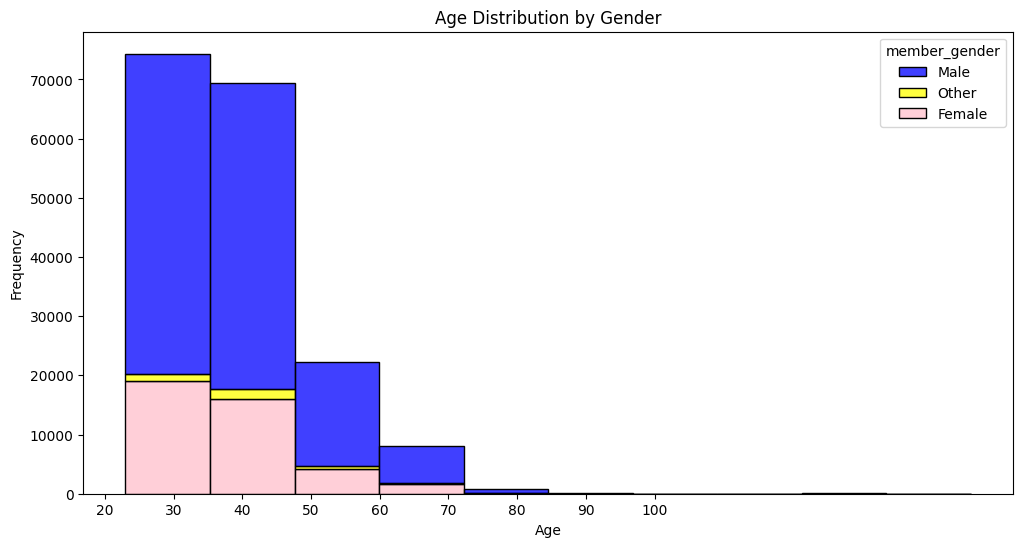

In [8]:
# Define the manual color palette
custom_palette = {'Male': 'blue', 'Female': 'pink', 'Other': 'yellow'}

# Draw the barchart plot with member_gender as hue
plt.figure(figsize=(12, 6))

sns.histplot(data=df_cleaned, x='age', hue='member_gender', multiple='stack', bins=10, palette=custom_palette)
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(np.arange(20, 101, 10))
plt.show()


## Average Duration Second by Age

> Here duration second by age was analyzed with a line graph. It is interesting that the graph does not progress linearly. While duration second is highest in the 20s, it is almost similar in the 30-60 age range. At some point over 80 years of age, it increased again. It is also seen that duration second approaches the lowest level as we approach the 80s.

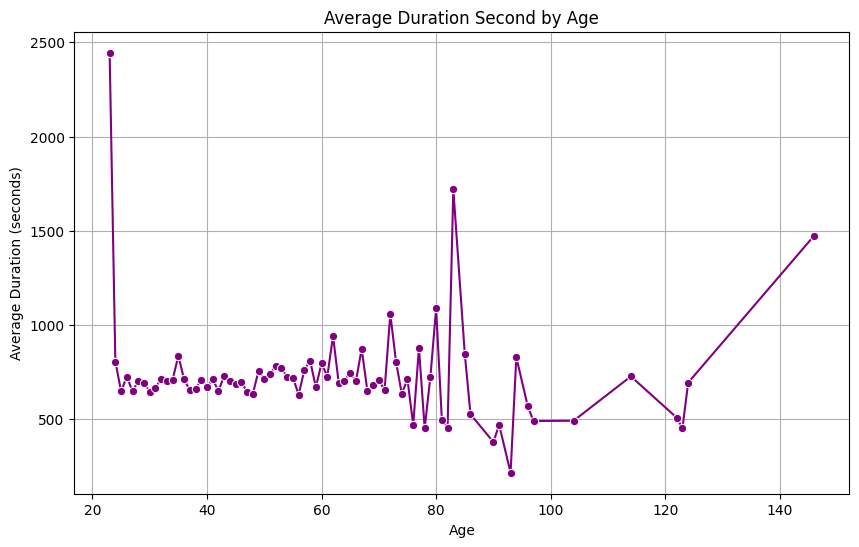

In [10]:
# Group by age and calculate the mean duration for each age
age_duration = df_cleaned.groupby('age')['duration_sec'].mean().reset_index()

# Plotting the line graph
plt.figure(figsize=(10, 6))
sns.lineplot(data=age_duration, x='age', y='duration_sec', color='purple', marker='o')
plt.title('Average Duration Second by Age')
plt.xlabel('Age')
plt.ylabel('Average Duration (seconds)')
plt.grid(True)
plt.show()

## Age Distribution by User Type

> Here we have a line graph where we can see the distribution of Age by user types. When we look at the graph, we see that most of the users are subscribers, as in the result we reached in the exploration section. Both user types are mostly between the ages of 20-40. For the subscriber type, as we move towards the age of 35-40, we also see a decline in the number of users and then a rising wave.

> All three graphs we have drawn prove that we have obtained parallel outputs to the work we have done in the exploration part of the project.

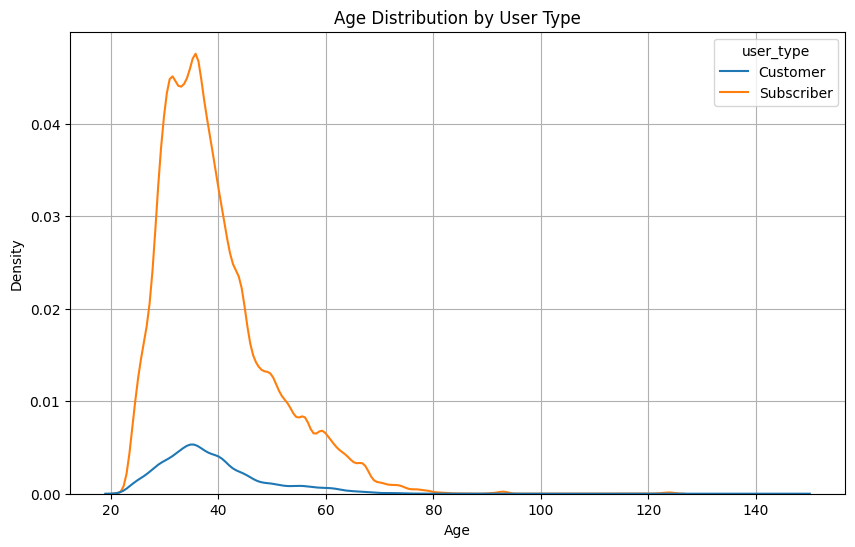

In [13]:
# Plotting the line graph
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_cleaned, x='age', hue='user_type', multiple='layer', fill=False)

# Customizing the plot
plt.title('Age Distribution by User Type')
plt.xlabel('Age')
plt.ylabel('Density')
plt.grid(True)
plt.show()